In [1]:
%matplotlib inline
import os, pickle, string
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from statannotations.Annotator import Annotator

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

RES_12_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/offspring/12/Result/"
RES_01_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/offspring/01/Result/"

In [7]:
## LP001
lp001_pl = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PL")
lp001_pl["Sample_name"] = "P" + lp001_pl["Sample"].str[2:]
lp001_pl = lp001_pl.set_index("Sample_name")
lp001_pl = lp001_pl.drop(columns="Sample")

lp001_pc = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PC", index_col="Sample")
lp001_psu = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PSugar", index_col="Sample")
lp001_pst = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PStarch", index_col="Sample")

sample_score_info = pd.read_table(os.path.join(RES_01_PATH, "Samples_Score_Info_01.tsv"))
sample_score_info["Sample_name"] = "P" + sample_score_info["Sample"]
sample_score_info["Sample_name"] = sample_score_info["Sample_name"].str.replace("_", "-", regex=False)
sample_score_info = sample_score_info.set_index("Sample_name")

data_01 = pd.concat([sample_score_info, lp001_pl, lp001_pc, lp001_psu, lp001_pst], axis=1)
data_01 = data_01.rename(columns={'Hap_Score.by_Total_pop':'Total_score', 
                                    'Hap_Score.by_VL_pop':'VL_score',
                                    'Hap_Score.by_G_pop':'G_score',
                                    'Hap_Score.by_VC_pop':'VC_score'})
data_01 = data_01.sort_values(by="Total_score")
data_01 = data_01.dropna(subset="Total_score")
data_01["Delta_score"] = data_01["Total_score"] - 94.40
data_01["Comb."] = "LP001×ZJ618"

# LP012
lp012_pl = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PL")
lp012_pl["Sample_name"] = "P" + lp012_pl["Sample"].str[2:]
lp012_pl = lp012_pl.set_index("Sample_name")
lp012_pl = lp012_pl.drop(columns="Sample")

lp012_pc = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PC", index_col="Sample")
lp012_pc = lp012_pc[~lp012_pc.index.duplicated(keep='first')]

lp012_psu = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PSugar", index_col="Sample")
lp012_psu = lp012_psu[~lp012_psu.index.duplicated(keep='first')]

lp012_pst = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PStarch", index_col="Sample")
lp012_pst = lp012_pst[~lp012_pst.index.duplicated(keep='first')]

sample_score_info = pd.read_table(os.path.join(RES_12_PATH, "Samples_Score_Info_four.tsv"))
sample_score_info["Sample_name"] = "P" + sample_score_info["Sample"]
sample_score_info["Sample_name"] = sample_score_info["Sample_name"].str.replace("_", "-", regex=False)
sample_score_info = sample_score_info.set_index("Sample_name")

data_12 = pd.concat([sample_score_info, lp012_pl, lp012_pc, lp012_psu, lp012_pst], axis=1)
data_12 = data_12.rename(columns={'Hap_Score.by_Total_pop':'Total_score', 
                                    'Hap_Score.by_VL_pop':'VL_score',
                                    'Hap_Score.by_G_pop':'G_score',
                                    'Hap_Score.by_VC_pop':'VC_score'})
data_12 = data_12.sort_values(by="Total_score")
data_12 = data_12.dropna(subset="Total_score")
data_12["Delta_score"] = data_12["Total_score"] - 88.96
data_12["Comb."] = "LP012×ZJ618"


data_con = pd.concat([data_01, data_12], axis=0)
data_con = data_con[["Comb.", 'Sample', 'Total_score', 'Delta_score', 'PL', 'Delta_PL', 'PC', 'Delta_PC', 
                     'PSugar','Delta_PSugar', 'PStarch', 'Delta_PStarch']].copy()
data_con = data_con.sort_values(by="Delta_score")

data_con

,Comb.,Sample,Total_score,Delta_score,PL,Delta_PL,PC,Delta_PC,PSugar,Delta_PSugar,PStarch,Delta_PStarch
P01-6-83,LP001×ZJ618,01_6_83,96.823727,2.423727,65.800000,-1.950000,93.4626,-39.8055,30.4200,5.8032,19.9699,3.4969
P01-6-71,LP001×ZJ618,01_6_71,96.823727,2.423727,61.500000,-6.250000,119.3451,-13.9230,31.8708,7.2540,16.2707,-0.2023
P01-6-15,LP001×ZJ618,01_6_15,96.823727,2.423727,54.000000,-13.750000,157.5441,24.2760,23.9616,-0.6552,16.5597,0.0867
P01-6-79,LP001×ZJ618,01_6_79,96.823727,2.423727,60.800000,-6.950000,140.5866,7.3185,29.2968,4.6800,13.7564,-2.7166
P01-6-22,LP001×ZJ618,01_6_22,96.823727,2.423727,54.333333,-13.416667,151.2966,18.0285,24.2190,-0.3978,17.2822,0.8092
...,...,...,...,...,...,...,...,...,...,...,...,...
P12-6-12,LP012×ZJ618,12_6_12,95.001939,6.041939,63.000000,8.125000,124.8786,-64.4385,22.5108,4.8906,21.8195,8.7278
P12-6-50,LP012×ZJ618,12_6_50,95.075841,6.115841,65.800000,10.925000,163.4346,-25.8825,20.5218,2.9016,14.8835,1.7918
P12-6-26,LP012×ZJ618,12_6_26,95.124858,6.164858,65.000000,10.125000,172.1811,-17.1360,17.0352,-0.5850,19.8254,6.7337
P12-6-22,LP012×ZJ618,12_6_22,95.213112,6.253112,65.600000,10.725000,132.1971,-57.1200,23.6340,6.0138,16.3285,3.2368


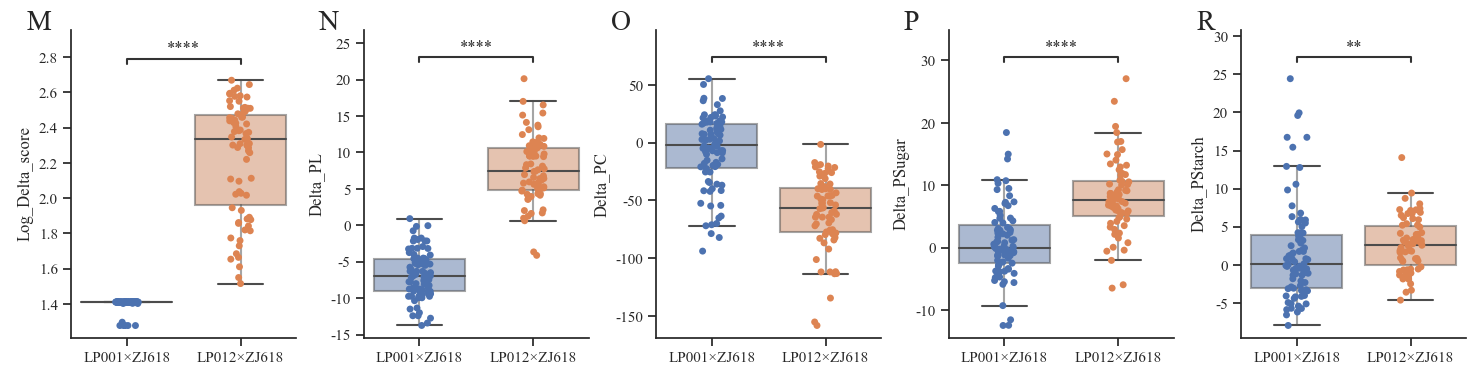

In [6]:
sns.set(font_scale=1, style="ticks")

letter_list = ['M','N','O', 'P', "R"]

def letter_annotation(ax, xoffset, yoffset, letter):

    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
            size=20, weight='bold')


fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
fig.subplots_adjust(wspace=0.3)

#data_list = [data_pl, data_pc, data_psu, data_pst]
data_item_list = ["Log_Delta_score", "Delta_PL", "Delta_PC", "Delta_PSugar", "Delta_PStarch"]
for i in range(0, 5):
    sns.boxplot(data_con, x="Comb.", y=data_item_list[i], boxprops=dict(alpha=0.5), whiskerprops=dict(alpha=0.5), showfliers=False, ax=axes[i])
    
    sns.stripplot(data_con, x="Comb.", y=data_item_list[i], hue="Comb.", legend=False, ax=axes[i])
    axes[i].set(xlabel="")

    axes[i].spines.right.set_visible(False)
    axes[i].spines.top.set_visible(False)

    annotator = Annotator(axes[i], [('LP001×ZJ618', 'LP012×ZJ618')], 
                          data=data_con, x="Comb.", y=data_item_list[i])
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
    annotator.apply_and_annotate()

    letter_annotation(axes[i], -0.2, 1., letter_list[i])

#plt.savefig(os.path.join(FIG_PATH, 'Fig_2L-O_plot_cross_result.pdf'), format='pdf', bbox_inches='tight', transparent=True)

In [58]:
data_con[data_con["Comb."]=="LP012×ZJ618"].describe()

,Total_score,Delta_score,PL,Delta_PL,PC,Delta_PC,PSugar,Delta_PSugar,PStarch,Delta_PStarch
count,74.000000,74.000000,74.000000,74.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,93.763436,-0.636564,62.567106,7.692106,128.678100,-60.639000,25.708131,8.087931,15.772381,2.680681
std,0.972060,0.972060,4.506038,4.506038,32.394907,32.394907,5.940350,5.940350,3.493939,3.493939
min,91.818696,-2.581304,50.750000,-4.125000,30.987600,-158.329500,11.115000,-6.505200,8.467700,-4.624000
25%,92.860580,-1.539420,59.785714,4.910714,112.205100,-77.112000,22.668750,5.048550,13.012225,-0.079475
50%,94.007107,-0.392893,62.267857,7.392857,132.911100,-56.406000,25.190100,7.569900,15.736050,2.644350
75%,94.515794,0.115794,65.475000,10.600000,149.779350,-39.537750,28.366650,10.746450,18.235900,5.144200
max,95.320580,0.920580,75.000000,20.125000,187.889100,-1.428000,44.694000,27.073800,27.166000,14.074300
